In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV files
filepaths = ['label_smoothing_0.csv',
             'label_smoothing_1.csv',
             'label_smoothing_2.csv']

# Read the CSV files into DataFrames
reports = [pd.read_csv(f'label_smoothing_{i}.csv') for i in range(3)]

In [47]:
# Define a function to plot the experiment metrics
def plot_experiment_metrics(filepaths, experiment_type, title=None):
    plt.figure(figsize=(14, 5))

    # Loop through each CSV file
    for filepath in filepaths:
        # Read the data
        data = pd.read_csv(filepath)
        # Filter the data for the specific experiment type
        exp_data = data[data['Experiment Type'] == experiment_type]

        # Check if the filtered data is empty
        if exp_data.empty:
            print(f"No data found for {experiment_type} in {filepath}.")
            continue

        # Extract the label smoothing value from the file name for the legend
        label_smoothing_value = filepath.split('_')[-1].split('.')[0]

        # Plot the training accuracy
        plt.subplot(1, 2, 1)
        plt.plot(exp_data['Epoch'], exp_data['Train Accuracy'], label=f'Train Acc LS 0.{label_smoothing_value}')
        plt.plot(exp_data['Epoch'], exp_data['Valid Accuracy'], '--', label=f'Valid Acc LS 0.{label_smoothing_value}')

        # Plot the training loss
        plt.subplot(1, 2, 2)
        plt.plot(exp_data['Epoch'], exp_data['Train Loss'], label=f'Train Loss LS 0.{label_smoothing_value}')
        plt.plot(exp_data['Epoch'], exp_data['Valid Loss'], '--', label=f'Valid Loss LS 0.{label_smoothing_value}')

    # Set the plot titles and labels
    plt.subplot(1, 2, 1)
    plt.title('Accuracy per Epoch' if title is None else f'Accuracy per Epoch - {title}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title('Loss per Epoch' if title is None else f'Loss per Epoch - {title}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [48]:
# Function to plot accuracy and loss for each experience separately for a given experiment type
def plot_metrics_for_experiment_type_separately(report_list, experiment_type):
    """
    This function plots the accuracy and loss for each experience separately for a given experiment type.

    Parameters:
    - reports (list of DataFrame): A list containing the pandas DataFrames of reports.
    - experiment_type (str): The type of experiment to plot.
    """
    # Determine global min and max for setting y-axis scales
    acc_min, acc_max, loss_min, loss_max = (100, 0, float('inf'), 0)
    for report in report_list:
        df = report[report['Experiment Type'] == experiment_type]
        acc_min = min(acc_min, df['Train Accuracy'].min(), df['Valid Accuracy'].min())
        acc_max = max(acc_max, df['Train Accuracy'].max(), df['Valid Accuracy'].max())
        loss_min = min(loss_min, df['Train Loss'].min(), df['Valid Loss'].min())
        loss_max = max(loss_max, df['Train Loss'].max(), df['Valid Loss'].max())

    # Iterate through the experiences and plot them
    for idx, report in enumerate(report_list):
        # Filter the DataFrame for the given experiment type
        df = report[report['Experiment Type'] == experiment_type]

        # Plot settings
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        fig.suptitle(f'Experience Label Smoothing 0.{idx} - {experiment_type}')

        # Accuracy plot
        ax1.plot(df['Epoch'], df['Train Accuracy'], label='Train Accuracy')
        ax1.plot(df['Epoch'], df['Valid Accuracy'], label='Validation Accuracy', linestyle='--')
        ax1.set_title('Accuracy over Epochs')
        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Accuracy')
        ax1.legend()
        ax1.grid(True)
        ax1.set_ylim([acc_min - 5, acc_max + 5])  # Set y-axis limits

        # Loss plot
        ax2.plot(df['Epoch'], df['Train Loss'], label='Train Loss')
        ax2.plot(df['Epoch'], df['Valid Loss'], label='Validation Loss', linestyle='--')
        ax2.set_title('Loss over Epochs')
        ax2.set_xlabel('Epochs')
        ax2.set_ylabel('Loss')
        ax2.legend()
        ax2.grid(True)
        ax2.set_ylim([loss_min - 0.05, loss_max + 0.05])  # Set y-axis limits

        # Show the plot
        plt.show()

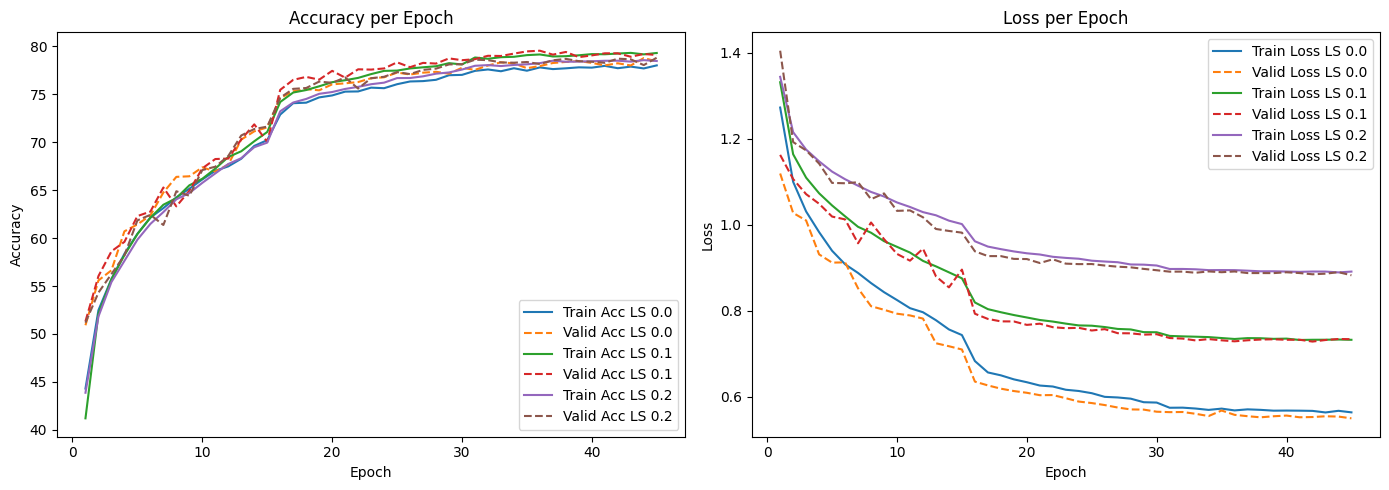

In [49]:
# Plot experiment type name and re-run the plotting function
plot_experiment_metrics(filepaths, 'Self-Supervise Rotation Model')

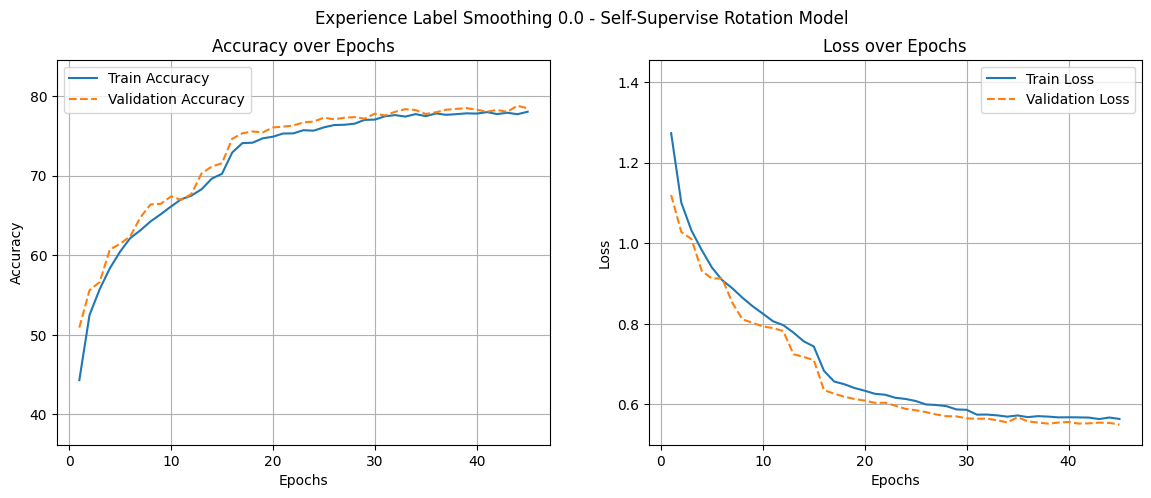

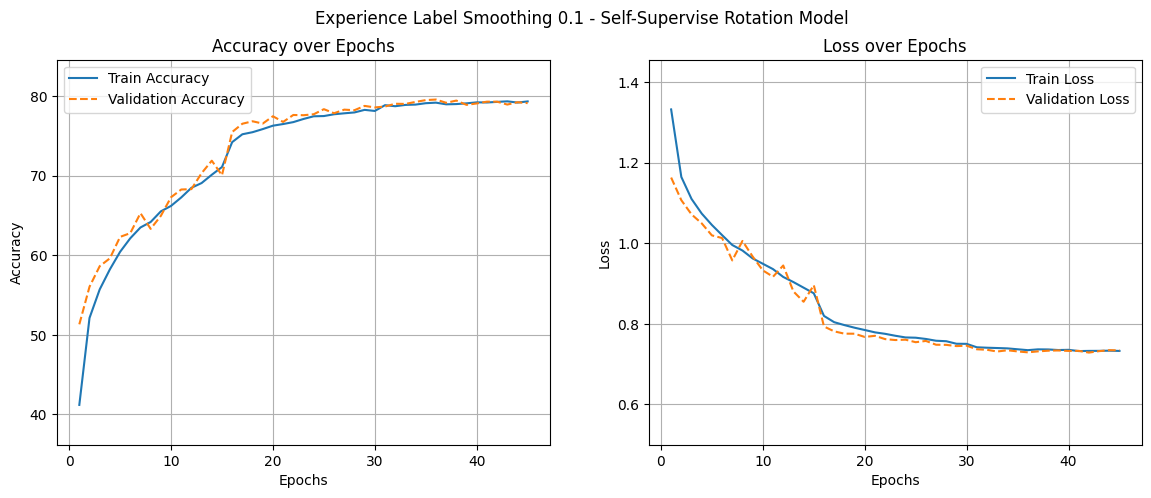

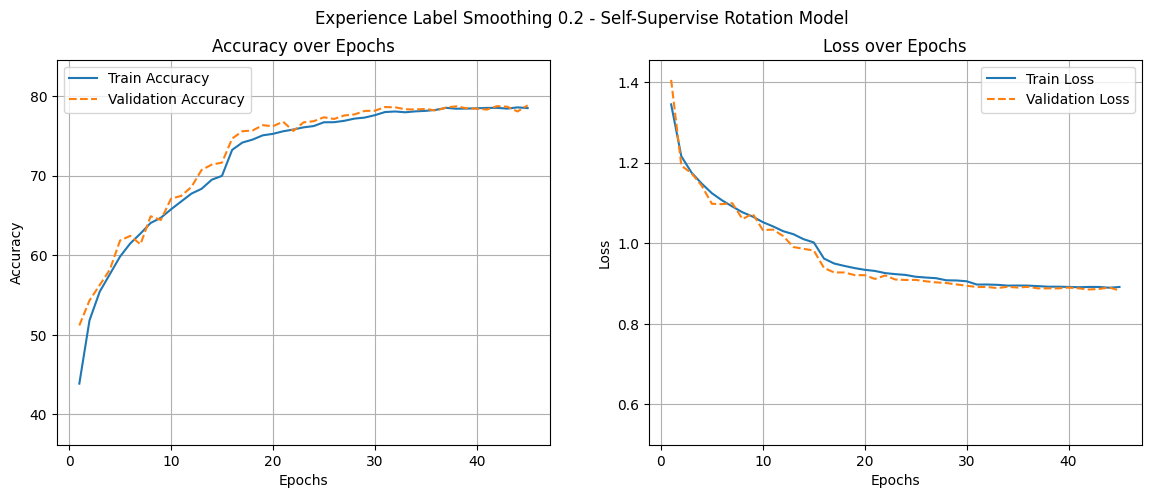

In [50]:
# Call the function with the list of reports and the specific experiment type
plot_metrics_for_experiment_type_separately(reports, 'Self-Supervise Rotation Model')

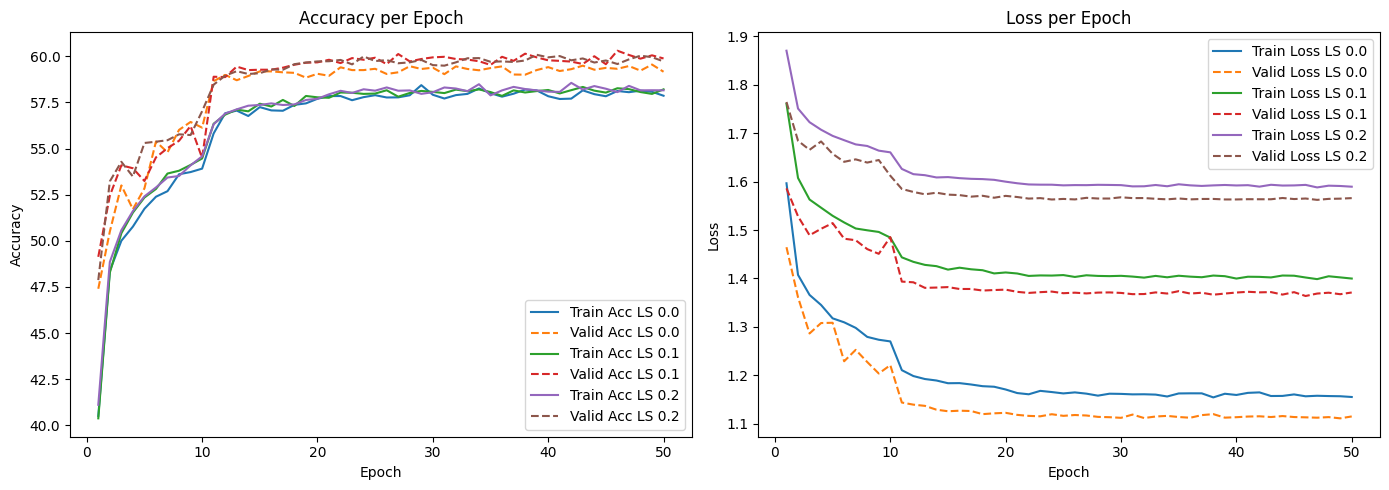

In [51]:
# Plot experiment type name and re-run the plotting function
plot_experiment_metrics(filepaths, 'Fine-tuning Pre-trained Model')

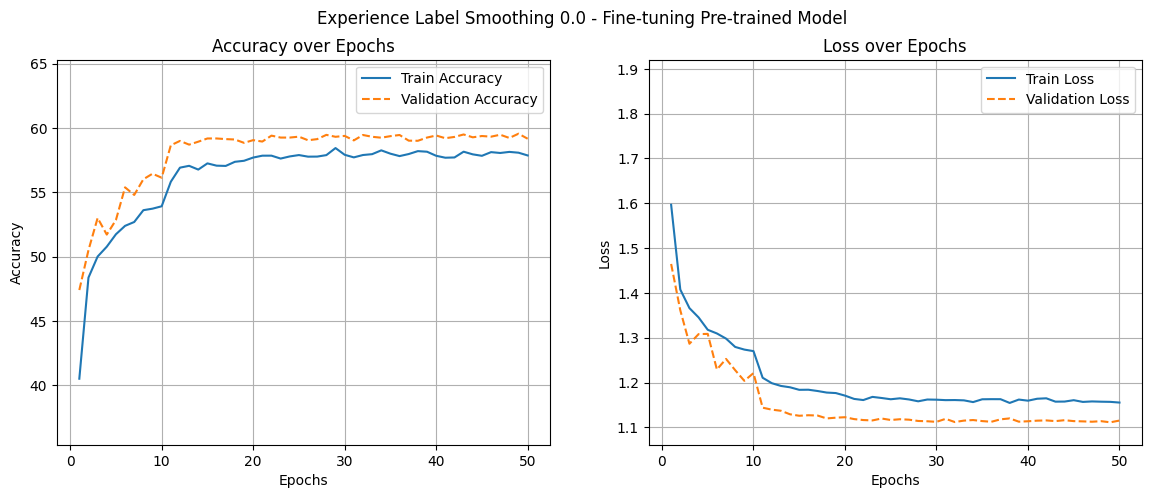

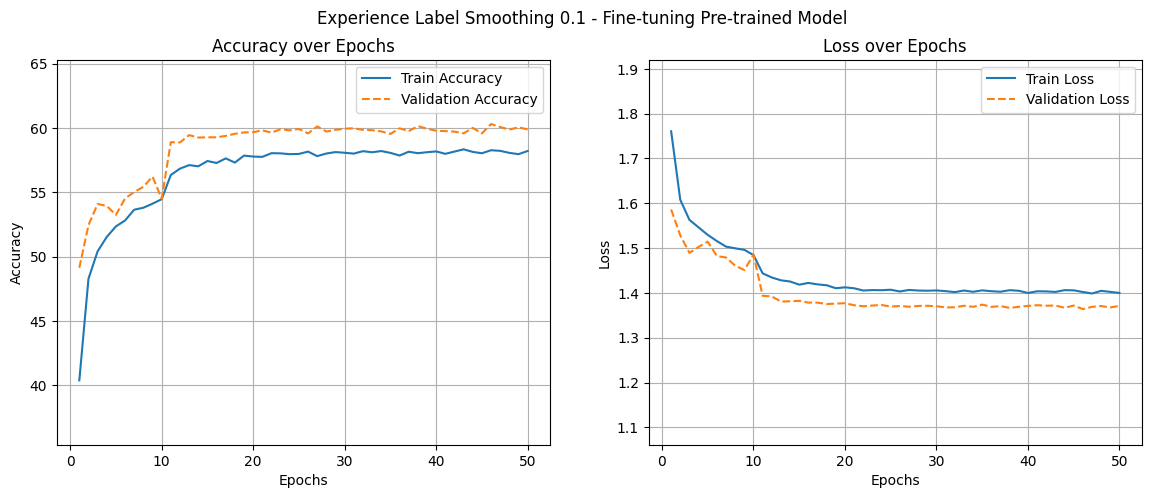

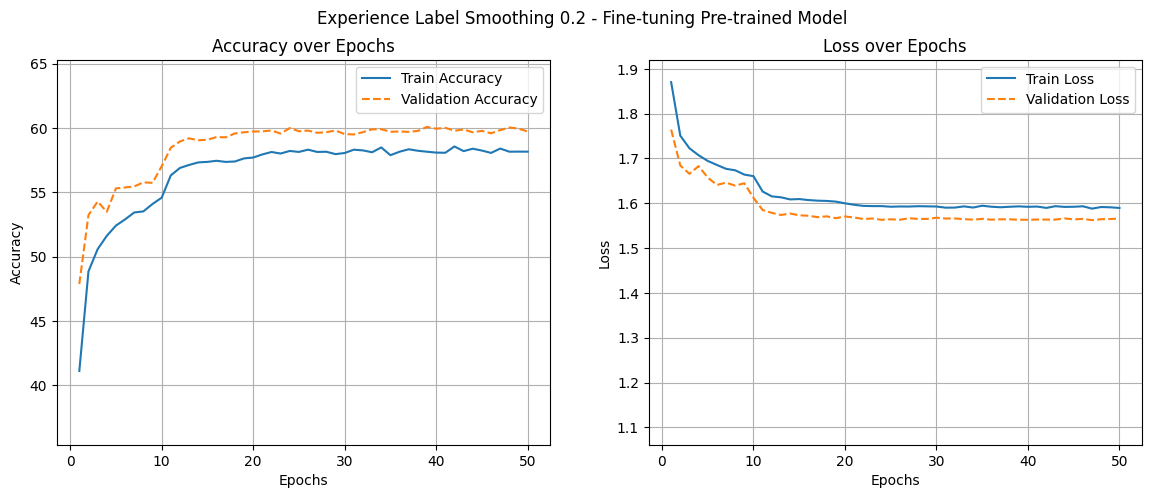

In [52]:
# Call the function with the list of reports and the specific experiment type
plot_metrics_for_experiment_type_separately(reports, 'Fine-tuning Pre-trained Model')

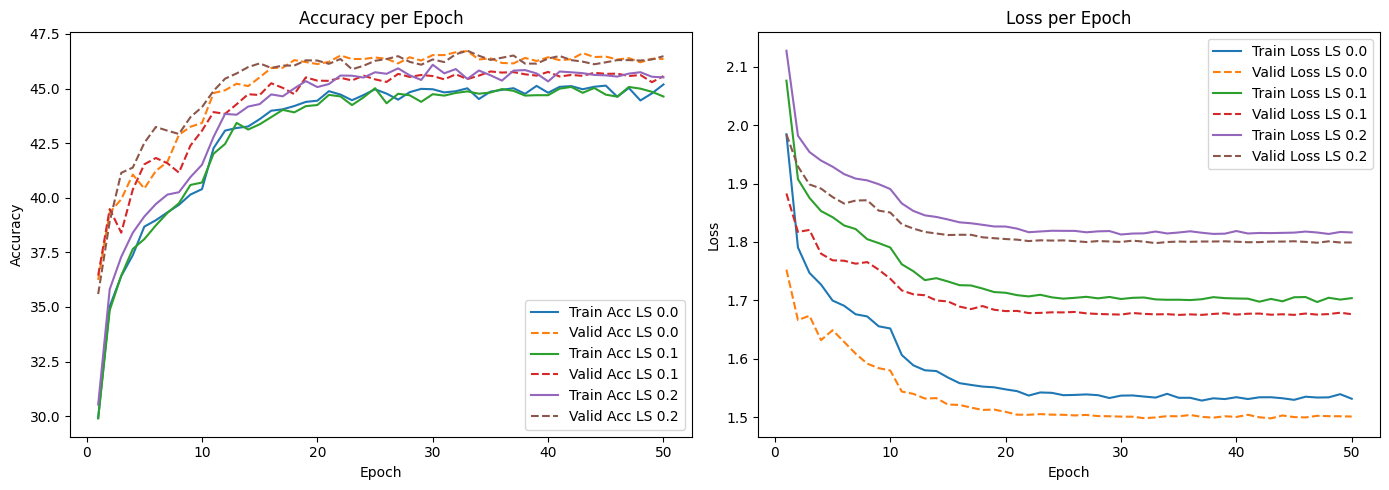

In [53]:
# Plot experiment type name and re-run the plotting function
plot_experiment_metrics(filepaths, 'Fine-tuning Randomly Initialized Model')

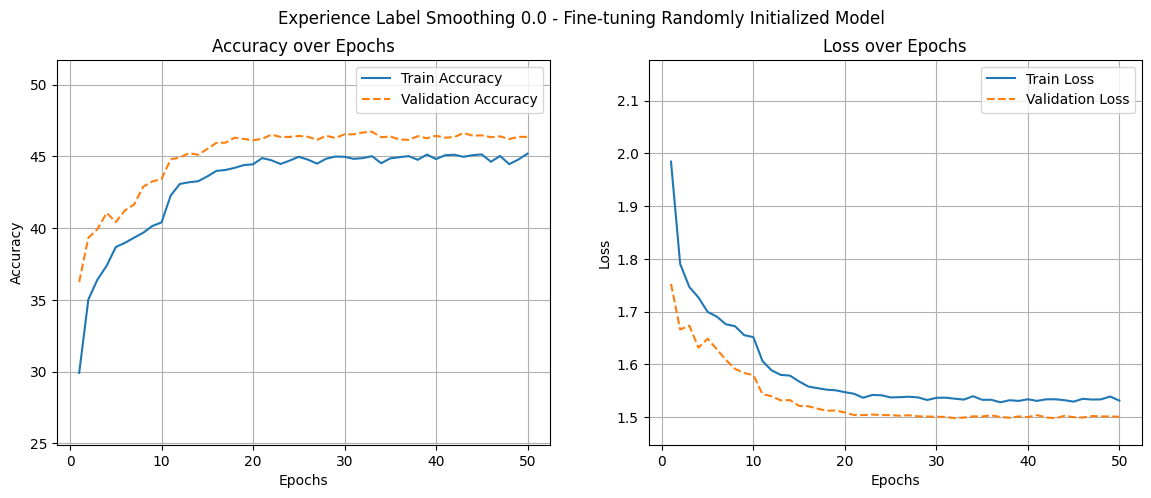

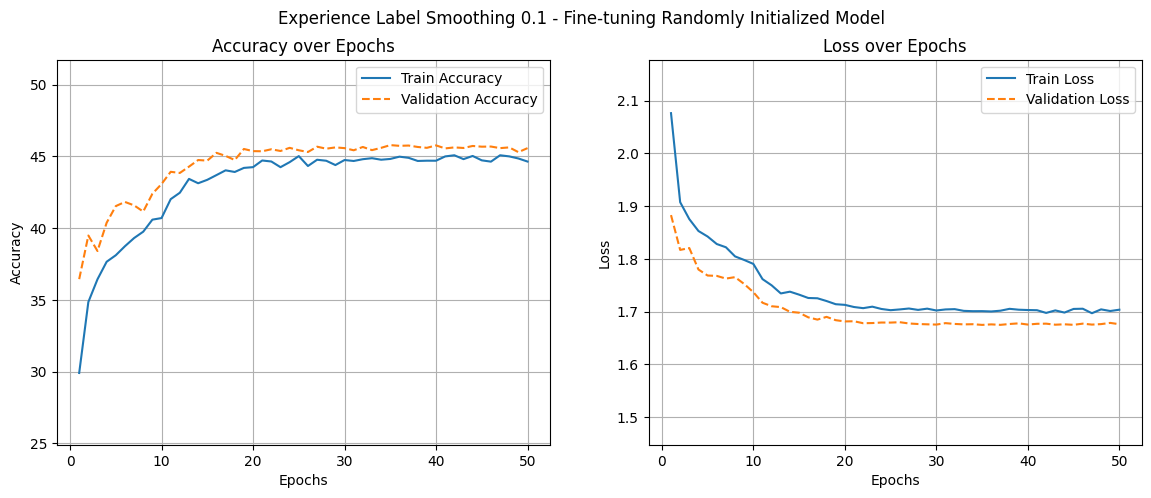

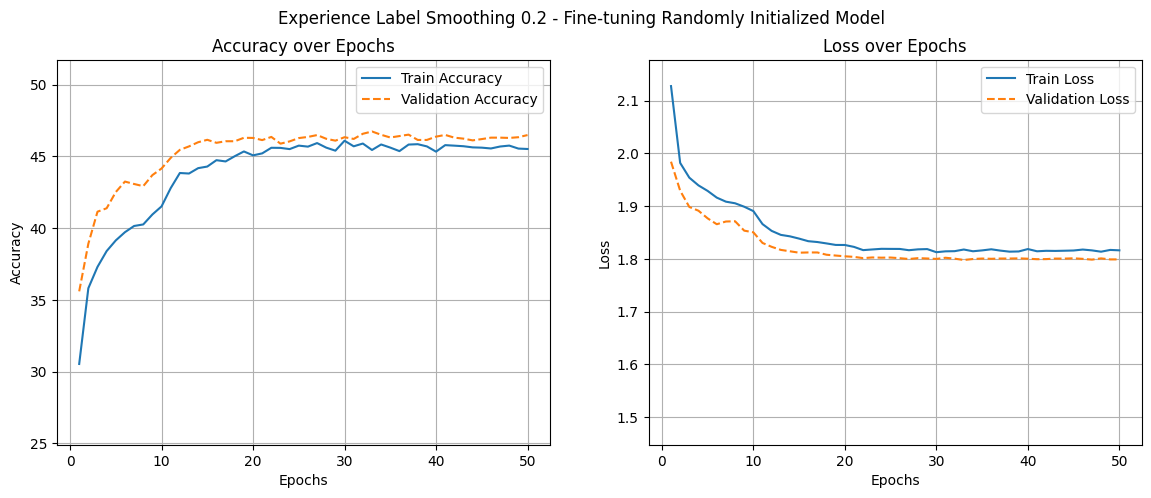

In [54]:
# Call the function with the list of reports and the specific experiment type
plot_metrics_for_experiment_type_separately(reports, 'Fine-tuning Randomly Initialized Model')

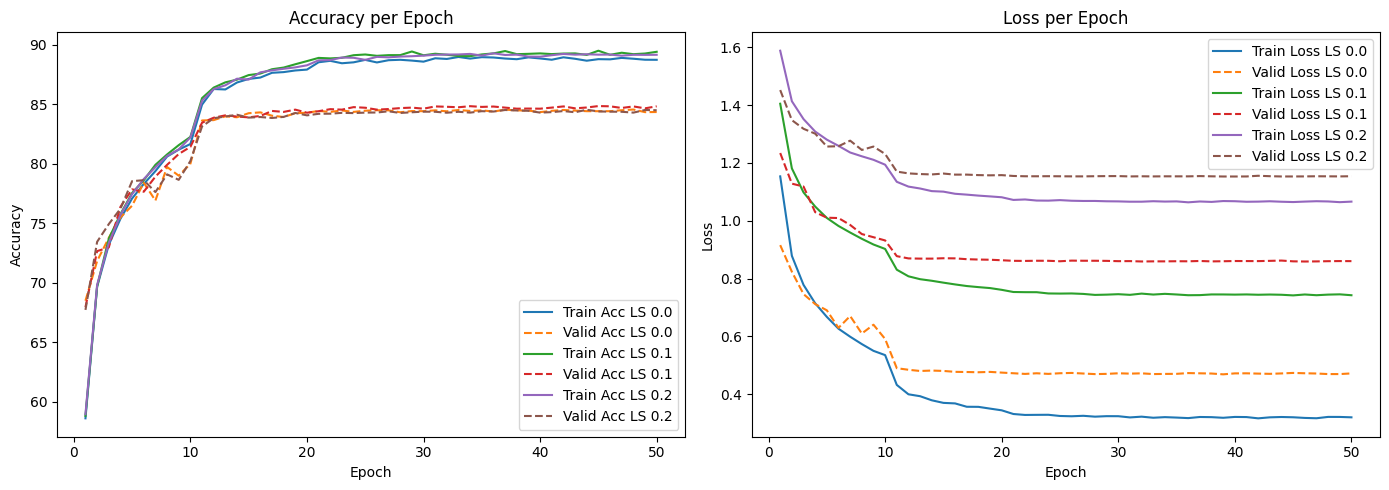

In [56]:
# Plot experiment type name and re-run the plotting function
plot_experiment_metrics(filepaths, 'Supervised Pre-trained Model')

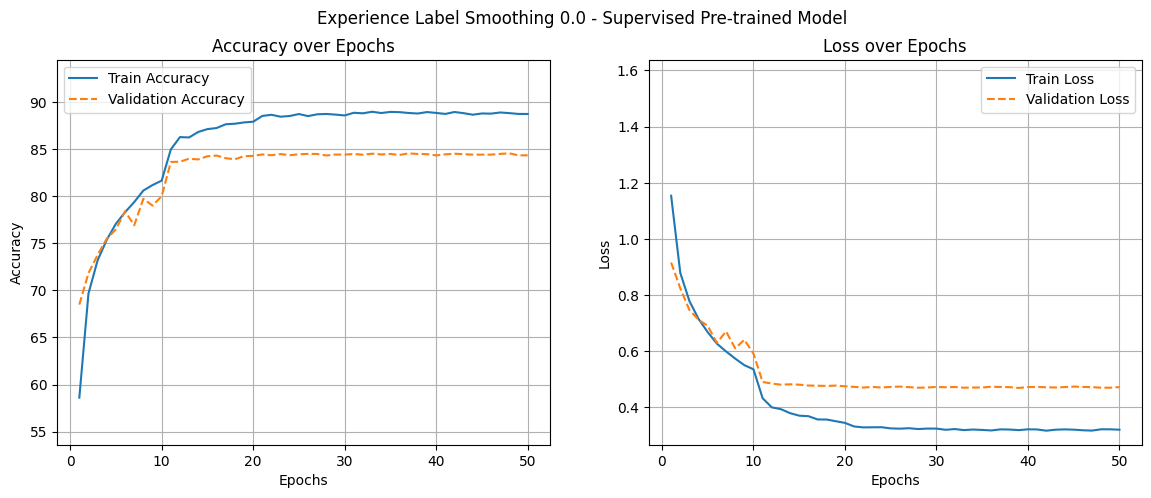

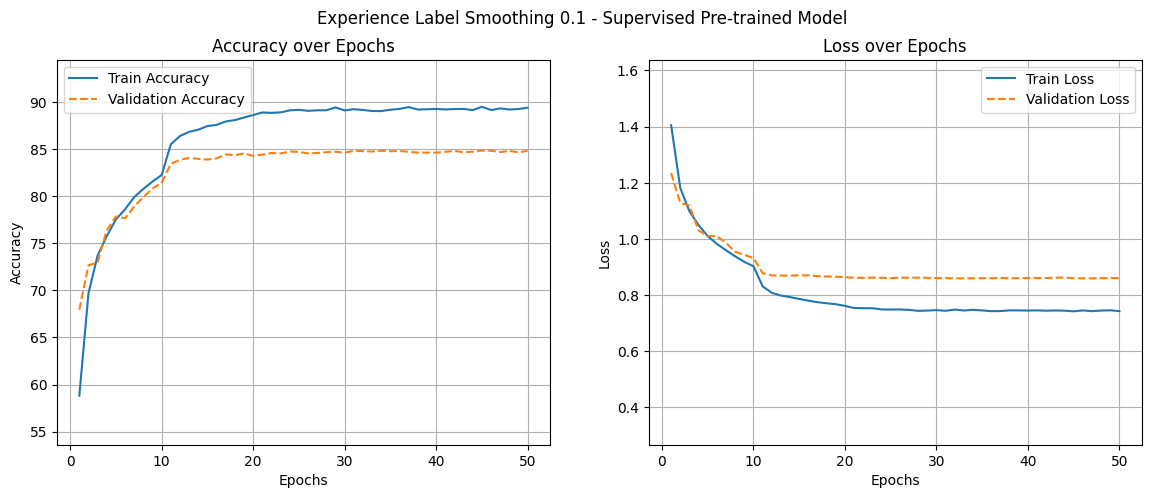

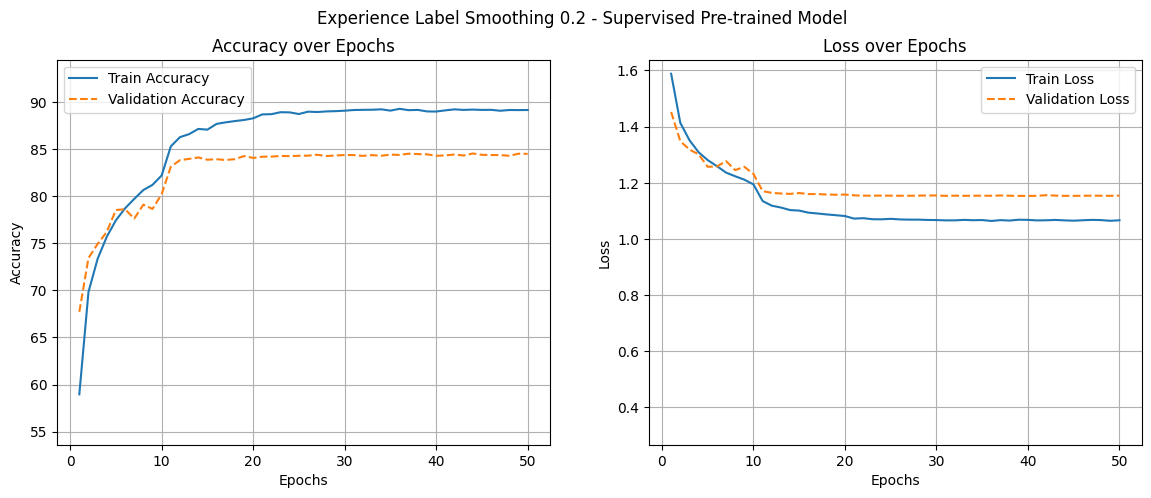

In [57]:
# Call the function with the list of reports and the specific experiment type
plot_metrics_for_experiment_type_separately(reports, 'Supervised Pre-trained Model')

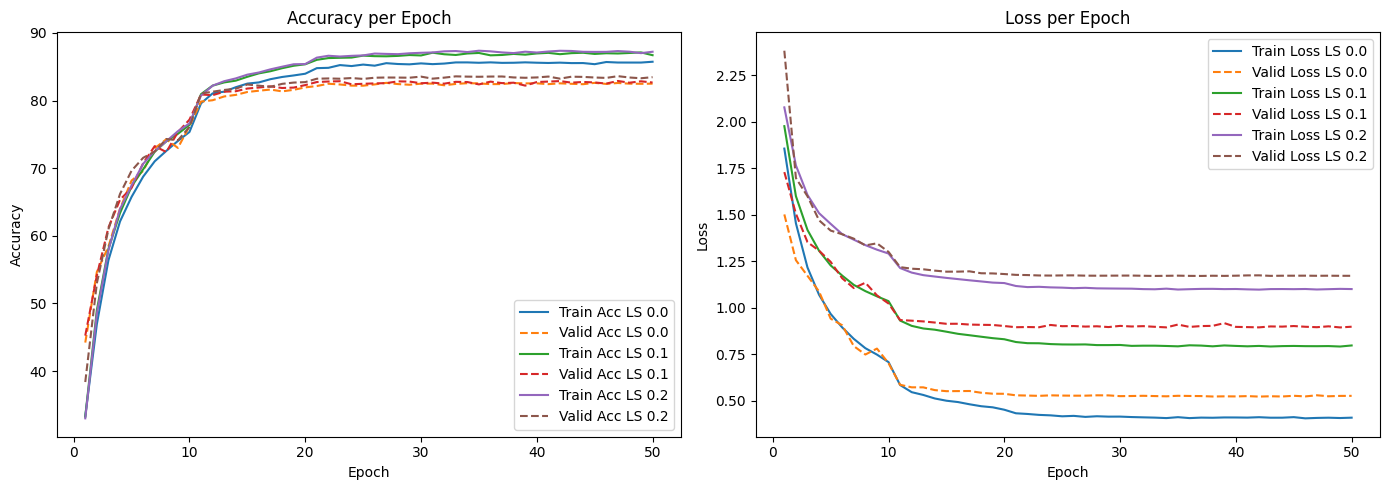

In [58]:
# Plot experiment type name and re-run the plotting function
plot_experiment_metrics(filepaths, 'Supervised Randomly Initialized Model')

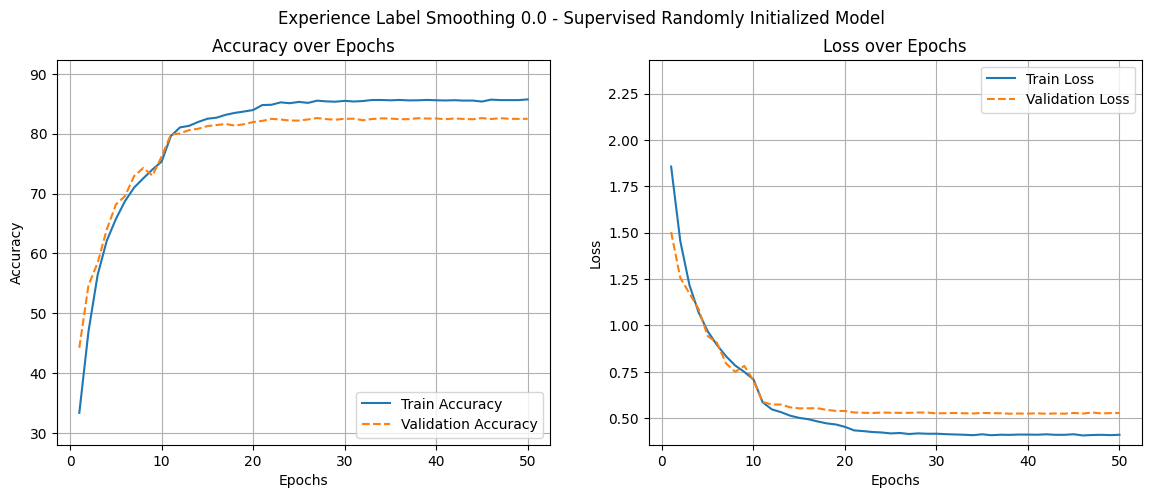

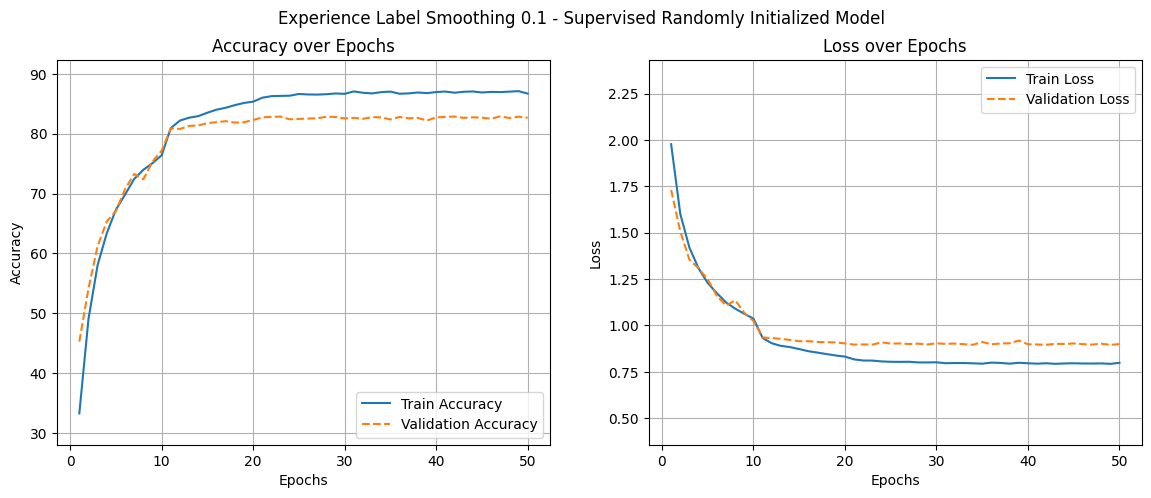

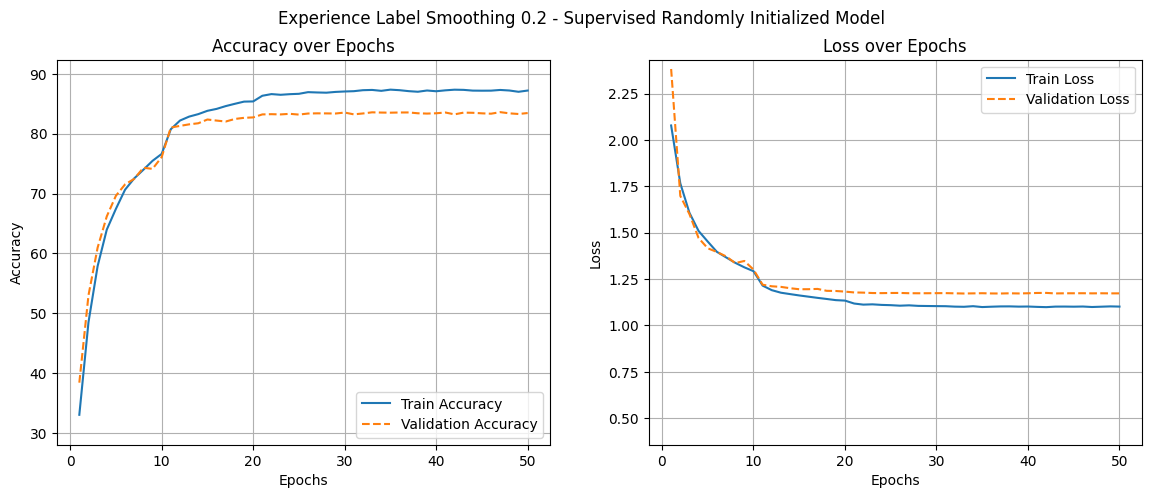

In [59]:
# Call the function with the list of reports and the specific experiment type
plot_metrics_for_experiment_type_separately(reports, 'Supervised Randomly Initialized Model')